In [36]:
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma
# from skimage.measure import compare_psnr
from skimage.util import random_noise
from skimage.color import rgb2gray, rgba2rgb
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc
import matplotlib.pylab as pylab

In [117]:
def plot_hist(r, g, b, title='', sz=20):
    r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
    pylab.hist(np.array(g).ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
    pylab.hist(np.array(b).ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
    pylab.xlabel('pixel value', size=sz), pylab.ylabel('frequency', size=sz)
    pylab.title(title, size=sz)

def plot_image(image, title='', sz=20):
    pylab.title(title, size=sz), pylab.imshow(image)
    pylab.axis(False)

def splitrgb(_im):
    return _im[...,0], _im[...,1], _im[...,2]

def mergergb(r,g,b):
    rgb = np.zeros((r.shape[0], r.shape[1], 3), dtype=np.uint8)
    rgb[...,0] = r
    rgb[...,1] = g
    rgb[...,2] = b
    return rgb

contrast = lambda im,r1,r2: np.uint8(255*(im-r1)/(r2-r1))



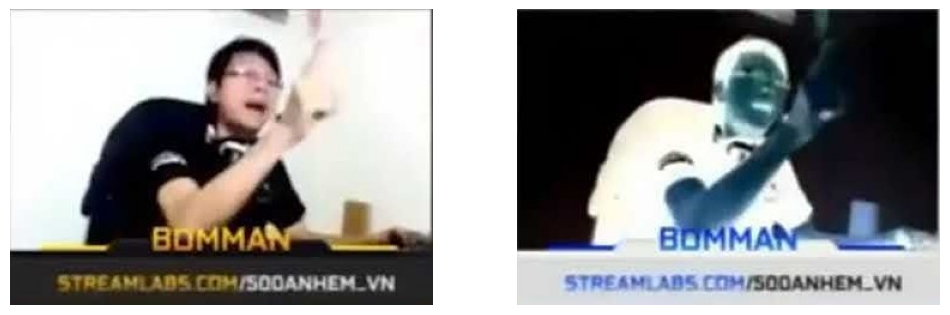

In [13]:
im = imread("../images/veryEasy.jpg")
im_neg = 255 - im 

plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(im), plt.axis(False)
plt.subplot(122), plt.imshow(im_neg), plt.axis(False)
plt.show()

## Log transform

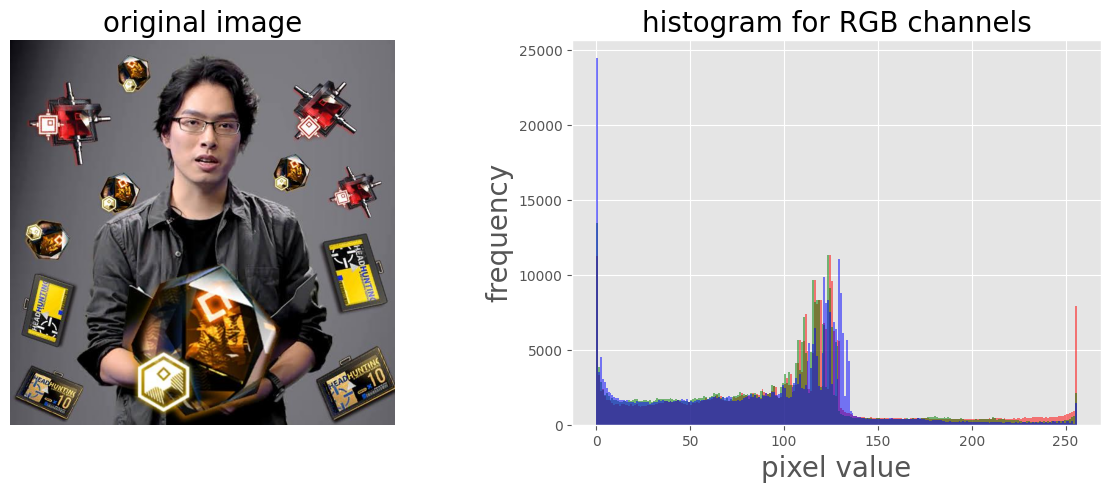

In [19]:
im = Image.open("../images/lowlight_with_power.jpg")
im_r, im_g, im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121), plot_image(im, 'original image')
pylab.subplot(122), plot_hist(im_r, im_g, im_b,'histogram for RGB channels')
pylab.show()

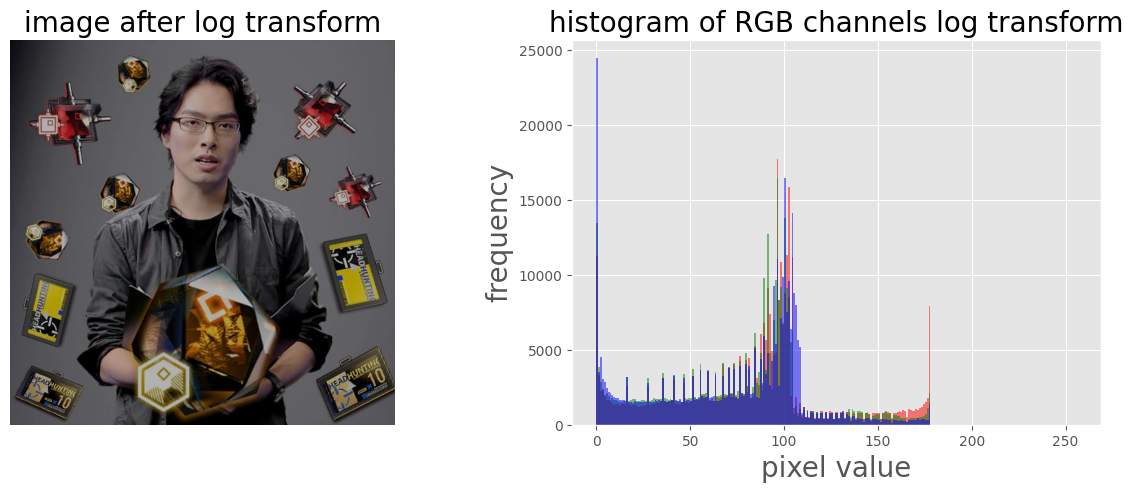

In [20]:
im = im.point(lambda i: 255*np.log(1+i/255))
im_r, im_g, im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121), plot_image(im, 'image after log transform')
pylab.subplot(122), plot_hist(im_r, im_g, im_b, 'histogram of RGB channels log transform')
pylab.show()

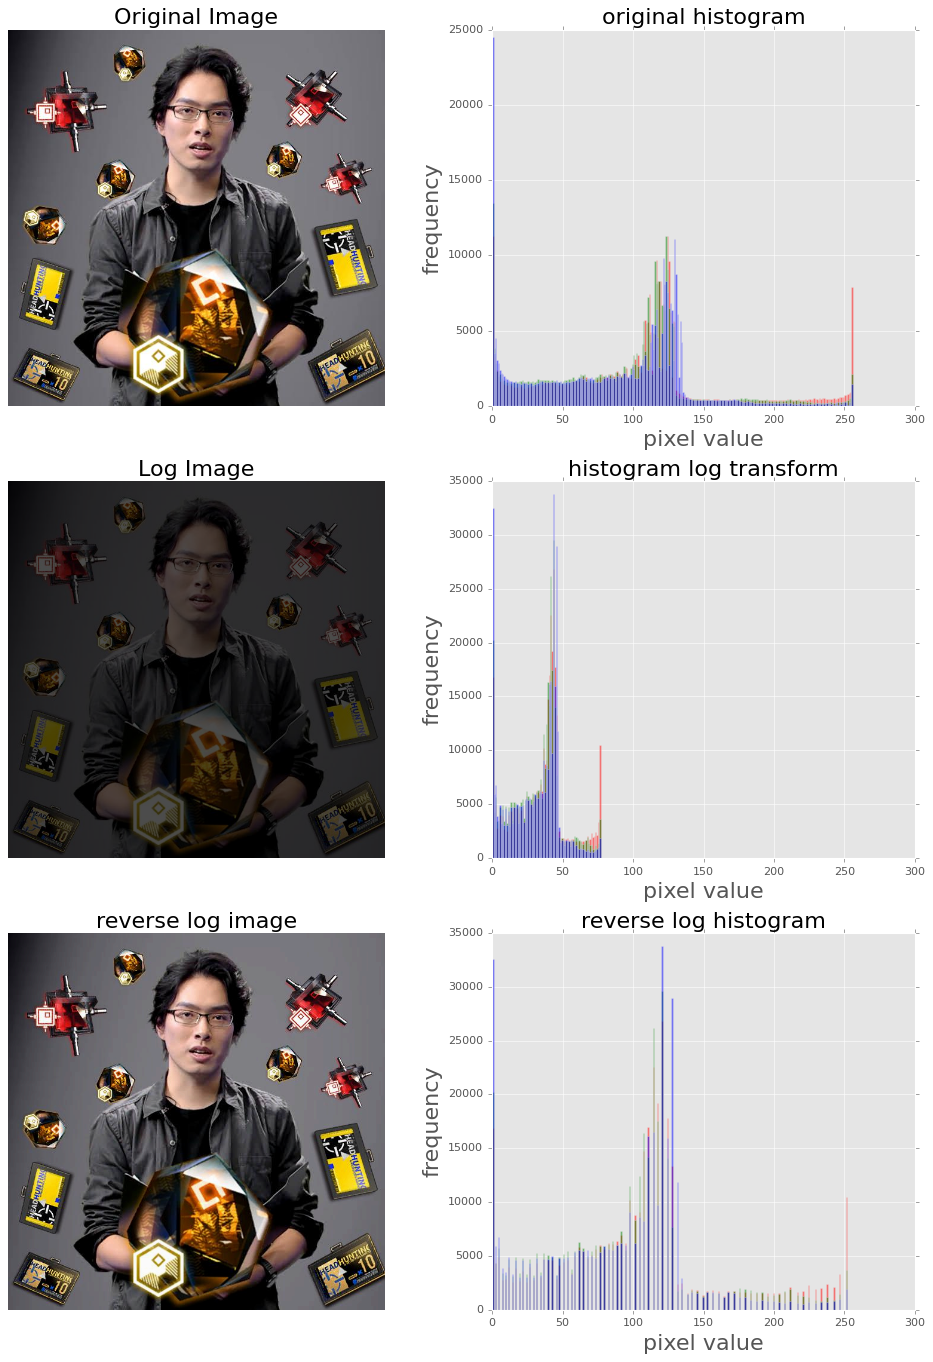

In [91]:
im = imread("../images/lowlight_with_power.jpg")
# print(im.dtype)
im_log = np.uint8(255*np.log10(1+im/255))
rlog = np.uint8((10**(im_log/255)-1) * 255)

plt.figure(figsize=(15,20))
plt.subplot(3,2,1), plot_image(im, "Original Image")
plt.subplot(3,2,2), plot_hist(im[...,0], im[...,1], im[...,2], "original histogram")
plt.subplot(3,2,3), plot_image(im_log, "Log Image")
plt.subplot(3,2,4), plot_hist(im_log[...,0], im_log[...,1], im_log[...,2], "histogram log transform")
plt.subplot(3,2,5), plot_image(rlog, "reverse log image")
plt.subplot(3,2,6), plot_hist(rlog[...,0], rlog[...,1], rlog[...,2], "reverse log histogram")
plt.show()

## Power-law transform

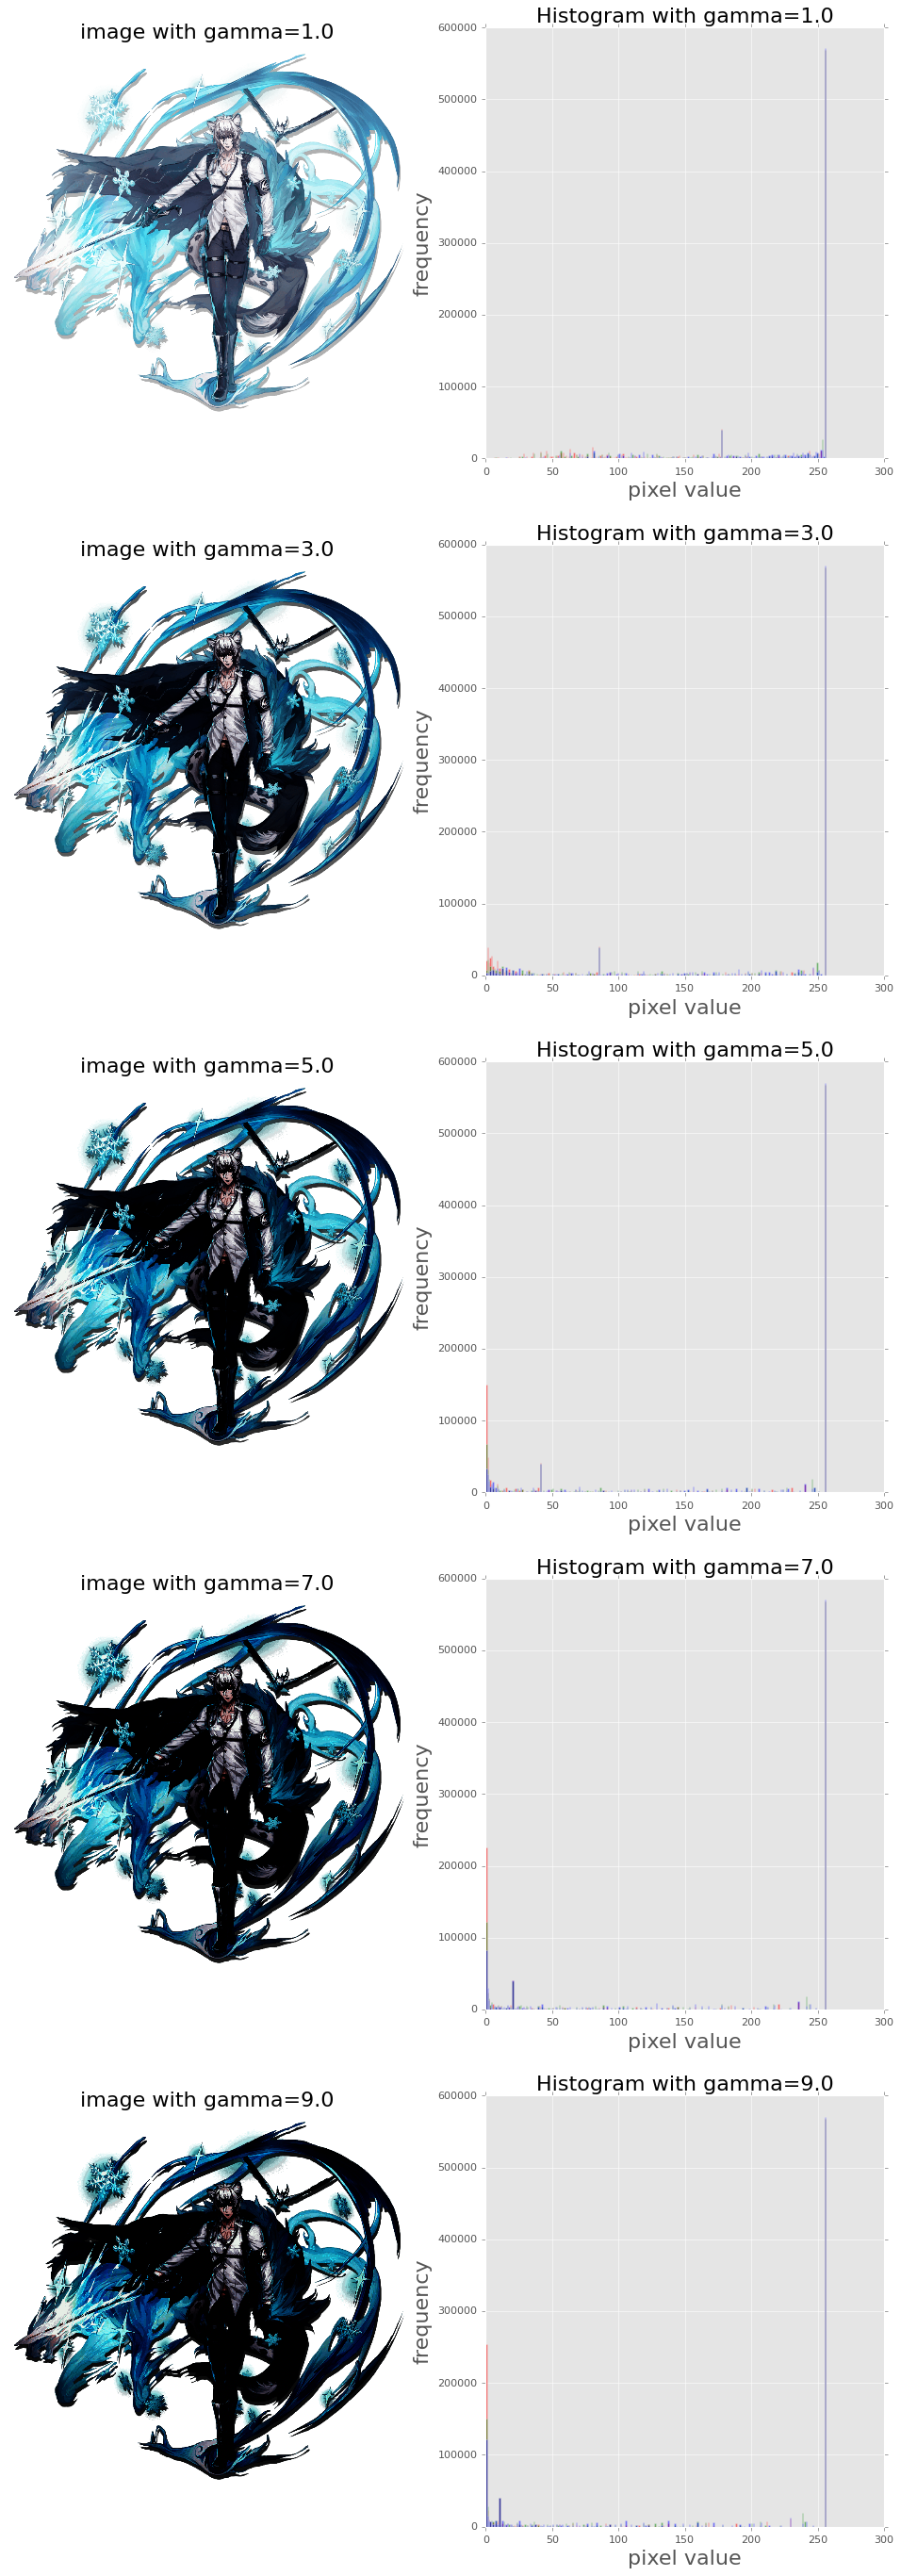

In [77]:
im = imread('../images/SilverAsh.png')
im = rgba2rgb(im) if im.shape[2] > 3 else im
im = img_as_float(im)

gammas = np.linspace(1,9,5)
i = 1
plt.figure(figsize=(15,50))
plt.style.use("ggplot")
for gamma in gammas:
    im1 = im**gamma
    plt.subplot(6,2,i), plot_image(im1, "image with gamma=" + str(gamma))
    r,g,b = splitrgb(im1)
    plt.subplot(6,2,i+1), plot_hist(r,g,b,"Histogram with gamma=" + str(gamma))
    i += 2


pylab.show()

0.023529411764705882 1.0


(<AxesSubplot: xlabel='pixel value', ylabel='frequency'>, None)

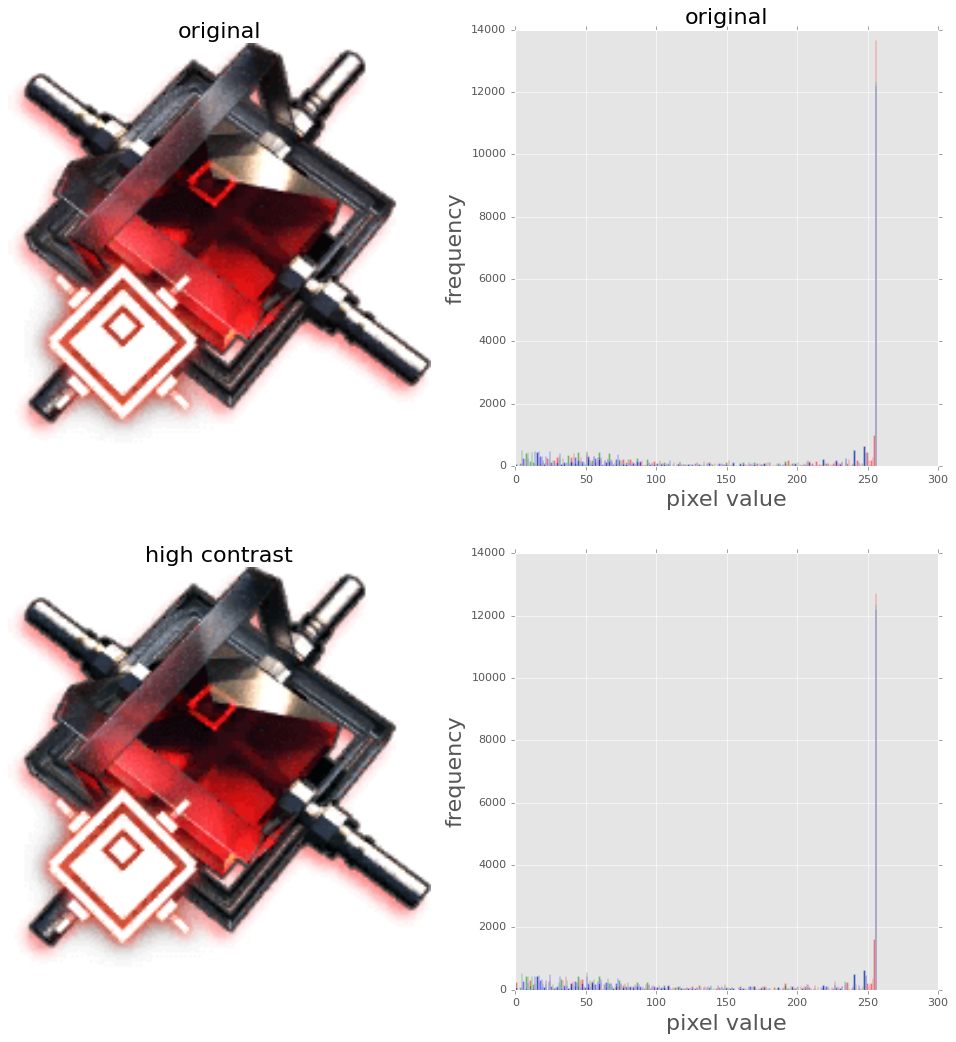

In [119]:
im = imread("../images/Orundum.png")
im = rgba2rgb(im) if im.shape[2] > 3 else im

plt.figure(figsize=(15,15))
plt.subplot(221), plot_image(im, "original")
r,g,b = splitrgb(im)
plt.subplot(222), plot_hist(r,g,b, "original")
print(np.min(r), np.max(r))
r = contrast(r,np.min(r),np.max(r))
g = contrast(g,np.min(g),np.max(g))
b = contrast(b,np.min(b),np.max(b))

im1 = mergergb(r,g,b)
plt.subplot(223), plot_image(im1, "high contrast")
plt.subplot(224), plot_hist(r,g,b)

# plt.imshow(im)